In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [2]:
data = pd.read_csv('Autism_dataset.csv')
data.head(20)

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
5,6,1,1,0,0,1,1,1,1,1,1,21,8,m,black,no,no,family member,Yes
6,7,1,0,0,1,1,1,0,0,1,0,33,5,m,asian,yes,no,family member,Yes
7,8,0,1,0,0,1,0,1,1,1,1,33,6,m,asian,yes,no,family member,Yes
8,9,0,0,0,0,0,0,1,0,0,1,36,2,m,asian,no,no,family member,No
9,10,1,1,1,0,1,1,0,1,1,1,22,8,m,south asian,no,no,Health Care Professional,Yes


In [3]:
data.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [5]:
data.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

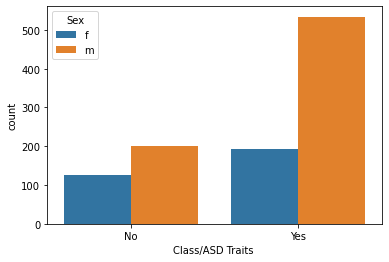

In [6]:
sns.countplot(x = 'Class/ASD Traits ', hue = 'Sex', data = data)

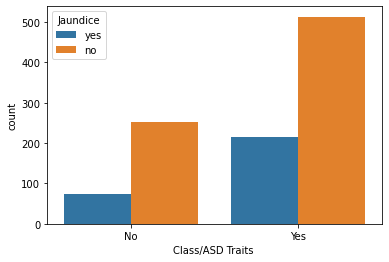

In [7]:
sns.countplot(x = 'Class/ASD Traits ', hue = 'Jaundice', data = data)

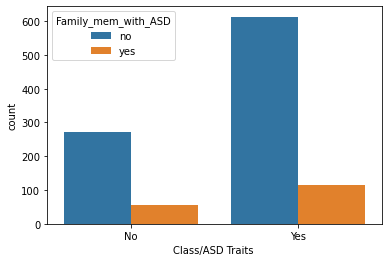

In [8]:
sns.countplot(x = 'Class/ASD Traits ', hue = 'Family_mem_with_ASD', data = data)

In [9]:
data = data.drop(["Who completed the test"],axis = 1)
data = data.drop(["Qchat-10-Score"],axis=1)



In [10]:
data.head(10)

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,f,middle eastern,yes,no,No
1,2,1,1,0,0,0,1,1,0,0,0,36,m,White European,yes,no,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,m,middle eastern,yes,no,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,m,Hispanic,no,no,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,f,White European,no,yes,Yes
5,6,1,1,0,0,1,1,1,1,1,1,21,m,black,no,no,Yes
6,7,1,0,0,1,1,1,0,0,1,0,33,m,asian,yes,no,Yes
7,8,0,1,0,0,1,0,1,1,1,1,33,m,asian,yes,no,Yes
8,9,0,0,0,0,0,0,1,0,0,1,36,m,asian,no,no,No
9,10,1,1,1,0,1,1,0,1,1,1,22,m,south asian,no,no,Yes


In [11]:
import sklearn
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder

le = LabelEncoder()
columns = ['Ethnicity', 'Family_mem_with_ASD', 'Class/ASD Traits ', 'Sex', 'Jaundice']
for col in columns:
    data[col] = le.fit_transform(data[col])           #Fit label encoder and return encoded labels
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Case_No              1054 non-null   int64
 1   A1                   1054 non-null   int64
 2   A2                   1054 non-null   int64
 3   A3                   1054 non-null   int64
 4   A4                   1054 non-null   int64
 5   A5                   1054 non-null   int64
 6   A6                   1054 non-null   int64
 7   A7                   1054 non-null   int64
 8   A8                   1054 non-null   int64
 9   A9                   1054 non-null   int64
 10  A10                  1054 non-null   int64
 11  Age_Mons             1054 non-null   int64
 12  Sex                  1054 non-null   int32
 13  Ethnicity            1054 non-null   int32
 14  Jaundice             1054 non-null   int32
 15  Family_mem_with_ASD  1054 non-null   int32
 16  Class/ASD Traits     105

In [12]:
X = data.drop(['Class/ASD Traits '], axis = 1)
Y = data['Class/ASD Traits ']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 7)

In [15]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 779 to 175
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Case_No              843 non-null    int64
 1   A1                   843 non-null    int64
 2   A2                   843 non-null    int64
 3   A3                   843 non-null    int64
 4   A4                   843 non-null    int64
 5   A5                   843 non-null    int64
 6   A6                   843 non-null    int64
 7   A7                   843 non-null    int64
 8   A8                   843 non-null    int64
 9   A9                   843 non-null    int64
 10  A10                  843 non-null    int64
 11  Age_Mons             843 non-null    int64
 12  Sex                  843 non-null    int32
 13  Ethnicity            843 non-null    int32
 14  Jaundice             843 non-null    int32
 15  Family_mem_with_ASD  843 non-null    int32
dtypes: int32(4), int64(12)
m

In [18]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(x_train)



In [25]:
reg = LogisticRegression()
reg.fit(X_scaled, y_train)


LogisticRegression()

In [26]:
X_test_scaled = preprocessing.scale(x_test)

In [29]:
pred = reg.predict(np.array(X_test_scaled))

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00       149

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211



In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

1.0